# Logistic Regression Exercise

## Digits Classification

<p style="line-height:1.75;font-size:16px">
The purpose of this exercise is to train a logistic regression model to predict handwritten digits (0-9). Since this is a multi-class classification problem, you will need to use OneVsRest, OneVsAll or Multinomial logsitic regression. Report different relevant metrics (precision, recall, f1, confusion matrix). What numbers do we misclassify the most? What do we classify them as?

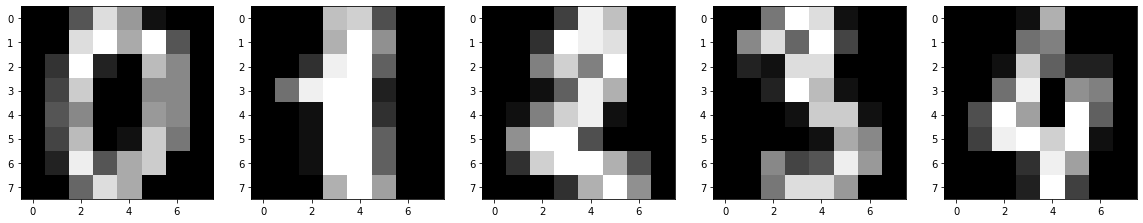

In [24]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
plt.figure(figsize=(20,4))
for index, image in enumerate(digits.data[0:5]):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = pd.Series(digits.target)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model = LogisticRegression(max_iter=1000)
ovo = OneVsRestClassifier(model)
ovo.fit(X_train, y_train)
y_pred = ovo.predict(X_test)
print(f'Train: {ovo.score(X_train, y_train)}')
print(f'Test: {ovo.score(X_test, y_test)}')
print(classification_report(y_true=y_test, y_pred=y_pred))

Train: 0.9965205288796103
Test: 0.9611111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      1.00      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.96      0.98        46
           5       0.94      0.94      0.94        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.90      0.90      0.90        30
           9       0.95      0.93      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [39]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_pred, y_test)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  1,  0,  0,  0,  2,  0],
       [ 0,  0, 33,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 44,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 27,  3],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 37]])

## Predicting Banking Subscription

<p style="line-height:1.75;font-size:16px">
The banking dataset comes from the <a href=>UCI Machine Learning repository</a> and is related to direct marketing phone calls of a Portuguese bank. The goal is to predict whether or not a client will subscribe to a term deposit (y variable). Before jumping into the classification task, explore the data and its features first. Try to create meaningful plots that will help guide your exploration. Think about feature engineering - should I create new features? Should I combine values of a certain feature? Once you have a better grasp of the data, try building a model. Consider using regularization, cross validation and feature selection if needed.

In [202]:
import pandas as pd
df = pd.read_csv('data/banking.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [214]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

1 - <b>age</b> (numeric)<br>
2 - <b>job</b> : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - <b>marital</b> : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - <b>education</b> (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - <b>default</b>: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - <b>housing</b>: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - <b>loan</b>: has personal loan? (categorical: 'no','yes','unknown')<br>
### related with the last contact of the current campaign:
8 - <b>contact</b>: contact communication type (categorical: 'cellular','telephone')<br>
9 - <b>month</b>: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - <b>day_of_week</b>: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - <b>duration</b>: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - <b>campaign</b>: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - <b>pdays</b>: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - <b>previous</b>: number of contacts performed before this campaign and for this client (numeric)<br>
15 - <b>poutcome</b>: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
### social and economic context attributes:
16 - <b>emp.var.rate</b>: employment variation rate - quarterly indicator (numeric)<br>
17 - <b>cons.price.idx</b>: consumer price index - monthly indicator (numeric)<br>
18 - <b>cons.conf.idx</b>: consumer confidence index - monthly indicator (numeric)<br>
19 - <b>euribor3m</b>: euribor 3 month rate - daily indicator (numeric)<br>
20 - <b>nr.employed</b>: number of employees - quarterly indicator (numeric)<br>

### Output variable (desired target):
21 - <b>y</b> - has the client subscribed a term deposit? (binary: 'yes','no')

From the data description we can immediately remove the duration since we are told that it is only known after the call has ended.

In [204]:
df.drop('duration', axis=1, inplace=True)

Let's take a look at our target variable counts

<AxesSubplot:xlabel='y', ylabel='count'>

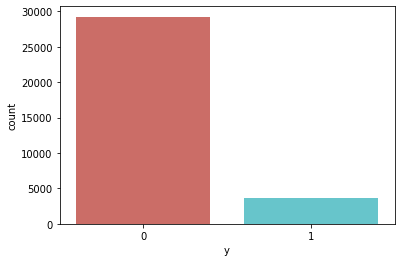

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


train, test = train_test_split(df, train_size=0.8)
train['y'].value_counts()
sns.countplot(x='y', data=train, palette='hls')

The data is pretty unbalanced (as should be expected), we'll have to deal with this somehow later.

In [190]:
train.groupby('y').mean()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
0,39.901507,2.633916,984.171737,0.132888,0.241699,93.601258,-40.597948,3.802898,5175.903207
1,41.002128,2.049202,795.633777,0.482979,-1.210505,93.357285,-39.768803,2.151335,5096.374441


It looks like people who signed up for the service were last contacted fewer days ago (pdays) and were contacted more times (previous) before this campaign.

In [191]:
train.groupby('education').mean()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic.4y,47.716873,2.598551,964.827950,0.146695,0.214790,93.660798,-40.283550,3.746832,5170.051585,0.103532
basic.6y,40.530878,2.527086,980.700433,0.134886,0.207259,93.640436,-41.160130,3.748392,5174.006501,0.086132
basic.9y,39.061224,2.545248,977.927438,0.144919,0.145145,93.616421,-41.328613,3.680355,5171.809112,0.080190
high.school,38.042729,2.581646,964.412043,0.185511,0.037694,93.588283,-40.928780,3.558217,5164.945845,0.111097
illiterate,47.200000,2.466667,999.000000,0.066667,0.160000,93.415733,-39.906667,3.795267,5181.393333,0.133333
professional.course,40.058880,2.581645,962.569726,0.160429,0.153349,93.567485,-40.160072,3.690842,5169.491776,0.114422
university.degree,38.829576,2.554109,952.066612,0.191740,-0.033798,93.488957,-39.951834,3.524944,5163.073212,0.138246
unknown,43.553441,2.592972,944.533675,0.220351,0.075256,93.658718,-39.849414,3.593860,5160.581406,0.141288


In [192]:
train.groupby('marital').mean()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
divorced,44.948885,2.622893,970.110386,0.171289,0.161501,93.605400,-40.769685,3.711201,5170.880207,0.104133
married,42.329139,2.574250,967.438584,0.155420,0.174987,93.594773,-40.261090,3.735487,5171.413441,0.103630
single,33.108161,2.523856,949.480570,0.210168,-0.169128,93.515338,-40.917638,3.317264,5155.407815,0.140544
unknown,41.290323,3.467742,951.161290,0.290323,-0.222581,93.484081,-40.729032,3.333226,5157.654839,0.129032


In [193]:
train.groupby('job').mean()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,
admin.,38.161433,2.636537,954.550328,0.189373,0.017194,93.530797,-40.257051,3.551390,5164.342364,0.130866
blue-collar,39.589382,2.557286,985.420233,0.123510,0.240520,93.653061,-41.375921,3.762048,5175.271533,0.070558
entrepreneur,41.633248,2.484147,982.825193,0.138817,0.167866,93.611907,-41.279692,3.799733,5176.742074,0.090831
housemaid,45.464923,2.680143,962.384067,0.133175,0.426754,93.665528,-39.497860,4.004018,5180.051367,0.099881
management,42.312873,2.462489,962.586530,0.183291,-0.047442,93.513039,-40.462873,3.576720,5165.052643,0.111679
retired,62.171139,2.475707,890.966642,0.331400,-0.708629,93.434140,-38.564322,2.752347,5121.216606,0.257433
self-employed,39.982410,2.652595,977.145998,0.128408,0.085400,93.560917,-40.543272,3.681756,5170.459631,0.107300
services,38.017161,2.601560,981.952574,0.153510,0.179688,93.640010,-41.273261,3.703223,5171.668019,0.079875
student,25.940146,2.070073,826.548905,0.551825,-1.406715,93.331248,-39.935036,1.891020,5085.872847,0.321168


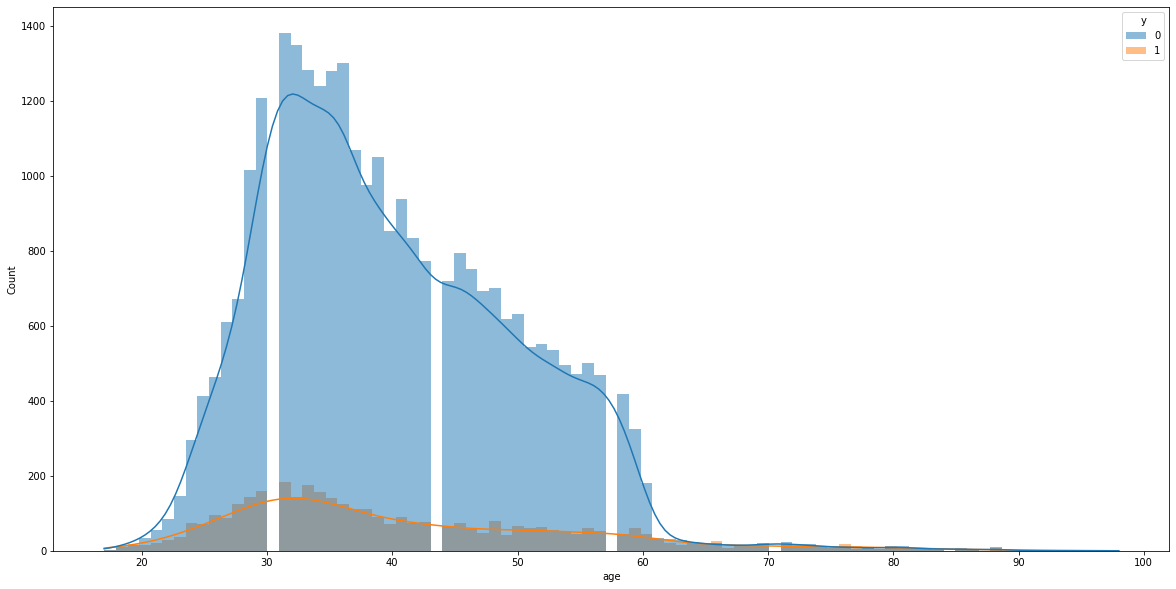

In [194]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=train, x='age', hue='y', stat='count', edgecolor=None, kde=True)
plt.show()

It seems that most of the customers are between 30-40 but it doesn't look like age affects the target variable.

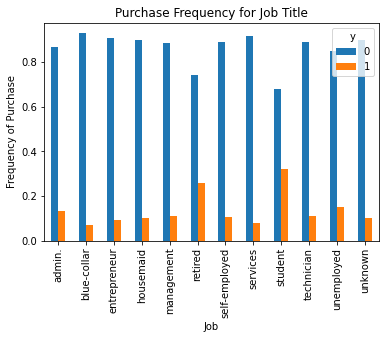

In [195]:
%matplotlib inline
pd.crosstab(train.job, train.y).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

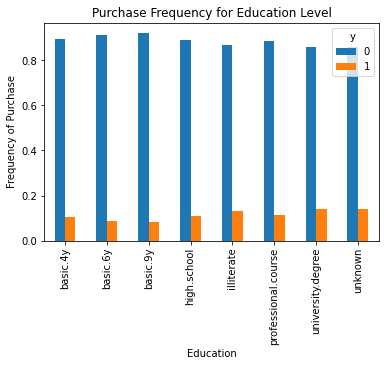

In [196]:
pd.crosstab(train.education, train.y).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Purchase Frequency for Education Level')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')
plt.show()

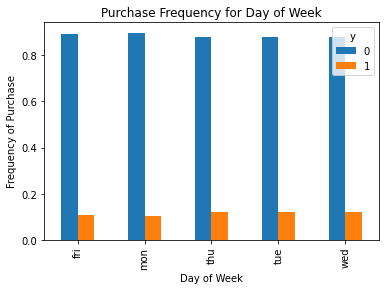

In [197]:
pd.crosstab(train.day_of_week, train.y).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.show()

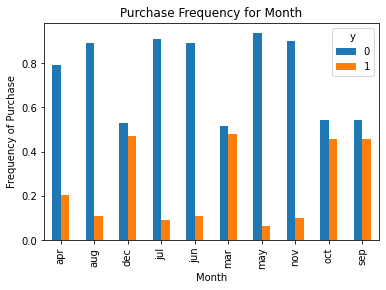

In [198]:
pd.crosstab(train.month, train.y).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

In [206]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
train = pd.concat([train.drop(cat_vars, axis=1), pd.get_dummies(train[cat_vars])], axis=1)
train

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
15051,37,1,999,0,1.4,93.918,-42.7,4.955,5228.1,0,...,0,0,0,0,0,1,0,0,1,0
8156,33,1,999,0,1.4,93.918,-42.7,4.957,5228.1,0,...,0,0,1,0,0,0,0,0,1,0
13117,52,1,999,0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,0,1,0,0,0,1,0
26971,51,4,999,0,-0.1,93.200,-42.0,4.076,5195.8,0,...,0,0,0,0,1,0,0,0,1,0
20200,51,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32053,52,1,999,0,1.4,93.444,-36.1,4.968,5228.1,0,...,0,0,0,0,1,0,0,0,1,0
21439,53,11,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,0,1,0,0,0,0,1,0
8835,46,1,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,1,0,0,0,0,0,1,0
35552,45,1,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,0,0,1,0,0,0,1,0


1.000000    31747
0.003003      345
0.006006      329
0.004004       96
0.007007       51
0.012012       51
0.002002       49
0.009009       49
0.010010       40
0.005005       40
0.013013       25
0.011011       23
0.001001       21
0.015015       20
0.014014       15
0.008008       14
0.000000       11
0.016016        8
0.017017        5
0.018018        4
0.019019        2
0.022022        2
0.027027        1
0.020020        1
0.021021        1
Name: pdays, dtype: int64

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

train[train.columns] = MinMaxScaler().fit_transform(train)
lr = LogisticRegression(max_iter=300)
cross_val_score(lr, train.drop('y', axis=1), train['y'], cv=10)

array([0.90561457, 0.90531108, 0.90531108, 0.89499241, 0.89681335,
       0.89984825, 0.90409712, 0.89772382, 0.90409712, 0.90045524])

In [209]:
from sklearn.metrics import classification_report, confusion_matrix
lr.fit(train.drop('y', axis=1), train['y'])
y_pred = lr.predict(train.drop('y', axis=1))
print(classification_report(train['y'], y_pred))
print(confusion_matrix(train['y'], y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     29254
         1.0       0.68      0.23      0.35      3696

    accuracy                           0.90     32950
   macro avg       0.80      0.61      0.65     32950
weighted avg       0.89      0.90      0.88     32950

[[28857   397]
 [ 2836   860]]


In [210]:
lr = LogisticRegression(max_iter=500, class_weight='balanced')

lr.fit(train.drop('y', axis=1), train['y'])
y_pred = lr.predict(train.drop('y', axis=1))
print(classification_report(train['y'], y_pred))
print(confusion_matrix(train['y'], y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     29254
         1.0       0.35      0.63      0.45      3696

    accuracy                           0.83     32950
   macro avg       0.65      0.74      0.68     32950
weighted avg       0.88      0.83      0.85     32950

[[25050  4204]
 [ 1385  2311]]


In [211]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
test = pd.concat([test.drop(cat_vars, axis=1), pd.get_dummies(test[cat_vars])], axis=1)
test[test.columns] = MinMaxScaler().fit_transform(test)

# lr = LogisticRegression(max_iter=500, class_weight='balanced')

# lr.fit(test.drop('y', axis=1), test['y'])
y_pred = lr.predict(test.drop('y', axis=1))
print(classification_report(test['y'], y_pred))
print(confusion_matrix(test['y'], y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      7294
         1.0       0.36      0.64      0.46       944

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.68      8238
weighted avg       0.88      0.83      0.85      8238

[[6204 1090]
 [ 341  603]]


In [212]:
sorted(list(zip(train.columns,lr.coef_[0])), key=lambda x: abs(x[1]), reverse=True)

[('emp_var_rate', -5.267176826809437),
 ('cons_price_idx', 3.5486405887941026),
 ('pdays', -1.2698424045637993),
 ('campaign', -1.2117885970070874),
 ('month_jun', 1.2018868032663264),
 ('euribor3m', 1.1604051368821584),
 ('previous', -0.7460149194090295),
 ('month_mar', -0.6348883652390297),
 ('month_may', -0.588822196605525),
 ('education_high.school', 0.5790091174631804),
 ('month_jul', -0.5343863598399824),
 ('month_aug', 0.487460542371171),
 ('cons_conf_idx', 0.4252038107818843),
 ('month_apr', 0.3636205482991822),
 ('day_of_week_wed', -0.3539724912398378),
 ('poutcome_nonexistent', 0.34155081288586997),
 ('job_management', 0.2965304287357668),
 ('loan_yes', 0.27539304500181483),
 ('contact_cellular', -0.274521429940595),
 ('default_unknown', -0.26934034458898787),
 ('marital_unknown', -0.23408122513912122),
 ('education_unknown', 0.2191260420881573),
 ('job_services', 0.21461790390691318),
 ('marital_single', 0.18610439489597894),
 ('month_oct', -0.16838500419149907),
 ('contact_